In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("casestudy.csv")
df = df.rename(columns={"Unnamed: 0": "Index"})
print('\033[1m' + '\n3 Years’ worth of customer orders: ' + '\033[0m')
df.head()


3 Years’ worth of customer orders: 


,Index,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [3]:
#Total revenue for the current year
Total_rev_per_year = pd.DataFrame(df.groupby("year").sum("net_revenue").iloc[:3,-1])
print('\033[1m' + '\nTotal revenue for each year: ' + '\033[0m')
Total_rev_per_year.head()


Total revenue for each year: 


,net_revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


In [4]:
print('\033[1m' + 'Total Customers - Year Wise: ' + '\033[0m')

df_2015 = df[df["year"]==2015]
df_2016 = df[df["year"]==2016]
df_2017 = df[df["year"]==2017]

print("\t2015 : ",df_2015.shape[0])
print("\t2016 : ",df_2016.shape[0])
print("\t2017 : ",df_2017.shape[0])

print('\033[1m' + '\nNew Customer Revenue: ' + '\033[0m')

new_2015_2016 = df_2016[~df_2016['customer_email'].isin(list(df_2015["customer_email"]))]
new_2016_2017 = df_2017[~df_2017['customer_email'].isin(list(df_2016["customer_email"]))]
print("Number of New Customers joined in 2016 : ",new_2015_2016.shape[0])
print("Number of New Customers joined in 2017 : ",new_2016_2017.shape[0])

just_old_2015_2016 = df_2015[df_2015['customer_email'].isin(list(df_2016["customer_email"]))]
just_old_2016_2017 = df_2016[df_2016['customer_email'].isin(list(df_2017["customer_email"]))]
#print("just_old_2015_2016:",just_old_2015_2016.shape)
#print("just_old_2016_2017:",just_old_2016_2017.shape)

#Existing Customer Growth
print('\033[1m' + '\nExisting Customer Growth: ' + '\033[0m')

join_15_16 = just_old_2015_2016.merge(df_2016,on="customer_email",suffixes=('_2015', '_2016'))
join_15_16_17 = join_15_16.merge(df_2017,on="customer_email",suffixes=('','_2017'))

join_15_16_17["revenue_change_2016"] = join_15_16_17["net_revenue_2016"] - join_15_16_17["net_revenue_2015"]
join_15_16_17["revenue_change_2017"] = join_15_16_17["net_revenue"] - join_15_16_17["net_revenue_2016"]
join_15_16_17[["customer_email","revenue_change_2016","revenue_change_2017"]].head()

Total Customers - Year Wise: 
	2015 :  231294
	2016 :  204646
	2017 :  249987

New Customer Revenue: 
Number of New Customers joined in 2016 :  145062
Number of New Customers joined in 2017 :  229028

Existing Customer Growth: 


,customer_email,revenue_change_2016,revenue_change_2017
0,hxshgpdxtr@gmail.com,36.76,-39.25
1,gipqsrvngd@gmail.com,33.35,16.84
2,akwxtbjuki@gmail.com,-133.52,-104.49
3,tcxbzksocq@gmail.com,82.34,-35.52
4,nfyvvsbdpy@gmail.com,35.55,-13.81



Graph of Existing Customer Growth: 


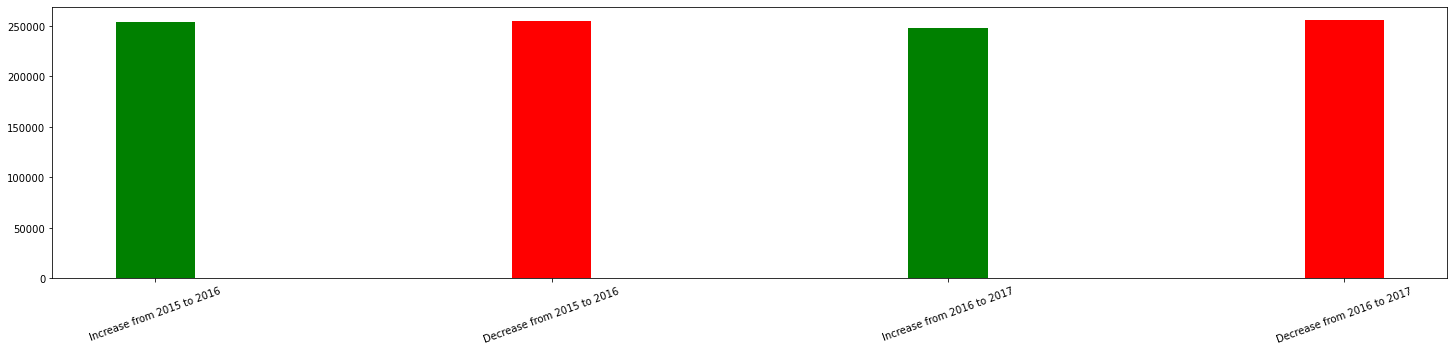

In [5]:
revenue_change_2015_2016 = join_15_16_17.groupby(join_15_16_17["customer_email"])["revenue_change_2016"].agg([('negative_2016' , lambda x : x[x < 0].sum()) , ('positive_2016' , lambda x : x[x > 0].sum())])
revenue_change_2016_2017 = join_15_16_17.groupby(join_15_16_17["customer_email"])["revenue_change_2017"].agg([('negative_2017' , lambda x : x[x < 0].sum()) , ('positive_2017' , lambda x : x[x > 0].sum())])

print('\033[1m' + '\nGraph of Existing Customer Growth: ' + '\033[0m')

plt.figure(figsize=(25,5))
plt.bar('Increase from 2015 to 2016',revenue_change_2015_2016.positive_2016.sum(),width=0.2,color="green")
plt.bar('Decrease from 2015 to 2016',revenue_change_2015_2016.negative_2016.sum()*-1,width=0.2,color="red")
plt.bar('Increase from 2016 to 2017',revenue_change_2016_2017.positive_2017.sum(),width=0.2,color="green")
plt.bar('Decrease from 2016 to 2017',revenue_change_2016_2017.negative_2017.sum()*-1,width=0.2,color="red")
plt.xticks(rotation=20)
plt.show()

In [6]:
#Lost Customers
lost_2015_2016 = df_2015[~df_2015['customer_email'].isin(list(df_2016["customer_email"]))]
lost_2016_2017 = df_2016[~df_2016['customer_email'].isin(list(df_2017["customer_email"]))]

print('\033[1m' + '\nRevenue lost from attrition: ' + '\033[0m')

print("Revenue lost from attrition from 2015 to 2016: $",lost_2015_2016.net_revenue.sum())
print("Revenue lost from attrition from 2016 to 2017: $",lost_2016_2017.net_revenue.sum())


Revenue lost from attrition: 
Revenue lost from attrition from 2015 to 2016: $ 21571632.070000004
Revenue lost from attrition from 2016 to 2017: $ 23110294.939999998


In [12]:
print('\033[1m' + "\nExisting customers' revenue for Current and Prior year: " + '\033[0m')

existing_customers = df_2015.merge(df_2016,on="customer_email",suffixes=('_2015', '_2016')).merge(df_2017,on="customer_email").rename(columns={"Index": "Index_2017","net_revenue": "net_revenue_2017","year": "year_2017"})
existing_customers.drop(['Index_2015','Index_2016','Index_2017','year_2015','year_2016','year_2017'],axis=1).head(10)


Existing customers' revenue for Current and Prior year: 


,customer_email,net_revenue_2015,net_revenue_2016,net_revenue_2017
0,hxshgpdxtr@gmail.com,180.59,217.35,178.10
1,gipqsrvngd@gmail.com,122.71,156.06,172.90
2,akwxtbjuki@gmail.com,246.79,113.27,8.78
3,tcxbzksocq@gmail.com,79.72,162.06,126.54
4,nfyvvsbdpy@gmail.com,187.65,223.20,209.39
5,xyepkoqbfk@gmail.com,125.37,192.89,38.74
6,hintjfrhht@gmail.com,84.41,216.46,28.45
7,vvqujrajxr@gmail.com,212.66,233.94,22.01
8,tmszhbybvl@gmail.com,120.67,17.84,115.21
9,dpaqajhzae@gmail.com,137.47,170.18,115.62


In [13]:
print('\033[1m' + '\nTotal Number of customers in the Current and Prior year: \n' + '\033[0m')
print("Total Number of Customers in 2015: ",df_2015.customer_email.shape[0])
print("Total Number of Customers in 2016: ",df_2016.customer_email.shape[0])
print("Total Number of Customers in 2017: ",df_2017.customer_email.shape[0])


Total Number of customers in the Current and Prior year: 

Total Number of Customers in 2015:  231294
Total Number of Customers in 2016:  204646
Total Number of Customers in 2017:  249987


In [9]:
count_df = pd.DataFrame()

count_df['Label'] = ['New Customers','Lost Customers']
count_df['From_2015_to_2016'] = [new_2015_2016.customer_email.shape[0:][0],lost_2015_2016.customer_email.shape[0:][0]]
count_df['From_2016_to_2017'] = [new_2016_2017.customer_email.shape[0:][0],lost_2016_2017.customer_email.shape[0:][0]]

count_df.head()

,Label,From_2015_to_2016,From_2016_to_2017
0,New Customers,145062,229028
1,Lost Customers,171710,183687


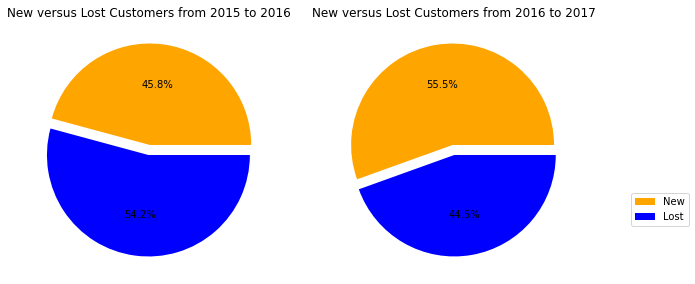

In [15]:
fig, (px1,px2) = plt.subplots(1,2,figsize=(10,10))
px1.pie(count_df.From_2015_to_2016,colors=["Orange","Blue"],autopct = '%1.1f%%',explode=[0.05,0.05])
px1.set_title('New versus Lost Customers from 2015 to 2016')
px2.pie(count_df.From_2016_to_2017,colors=["Orange","Blue"],autopct = '%1.1f%%',explode=[0.05,0.05])
px2.set_title('New versus Lost Customers from 2016 to 2017')
px2.legend(["New","Lost"],loc=(1.2,0.2))

In [16]:
print("This shows that the there were comparitively lesser new customers in 2016 compared to 2017.")

This shows that the there were comparitively lesser new customers in 2016 compared to 2017.
